# Bird Identification System
Image classification system that creates and uses a CNN model to determine the species of a bird in an image.

In [27]:
# install if needed:
%pip install tensorflow
%pip install circlify

Note: you may need to restart the kernel to use updated packages.


In [28]:
# import statements 
import tensorflow as tf
from tensorflow import keras, data
from keras import layers, Sequential
from keras.utils import image_dataset_from_directory as dir_flow
from keras.callbacks import EarlyStopping #ModelCheckpoint

from matplotlib import pyplot as plt
from matplotlib import image as img

import seaborn as sns
import pandas as pd
import numpy as np
import glob
import circlify

## Check the data/images directory and files

In [4]:
# check all image files are available by getting the total count of images in train directory:
image_count = len(list(glob.glob('./train/*/*')))  # length of list of all images in train folder
print(image_count)  # total number of images in train folder

84635


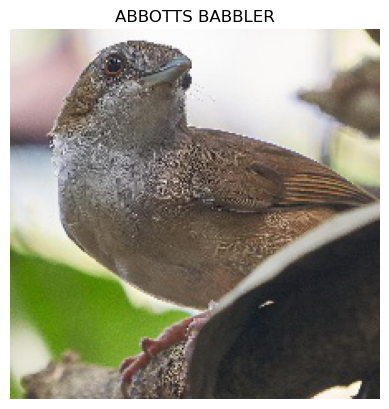

In [5]:
# check: display first image in folder
images = list(glob.glob('./train/*/*'))  # get list of images in train folder
name = images[0].split('\\')[1]  # name of bird species in the first image

image = img.imread(images[0])  # access image

plt.title(name)  # set name of file as image title
plt.axis('off')  # remove x/y axis of image
plt.imshow(image)  # display image

## Create datasets from image directories

In [6]:
# create datasets from photos in each directory (train, valid, test)
# for performance optimization -> cache then prefetch for train/valid sets
# for training set -> shuffle after caching

# training set
train_set = dir_flow(
    './train',
    labels='inferred',
    label_mode='int',
    seed=40,  # for shuffling
    image_size=(150, 150),  # training size; original image size: 224x224
    batch_size=64  # or 32
)

Found 84635 files belonging to 525 classes.


In [7]:
# get list of species names before using prefetch
# access species names with class_names: train_set.class_names -> dir names in alphabetical order
species_names = train_set.class_names
print(species_names)  # all species names in the dataset
print(len(species_names))  # total num of species in dataset

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

In [8]:
# optimize performance for train set
train_set = train_set.cache().shuffle(40).prefetch(data.AUTOTUNE)

In [9]:
# create validation set + cache/prefetch
validation_set = dir_flow(
    './valid',
    labels='inferred',
    label_mode='int',
    shuffle=False,
    image_size=(150, 150),
    batch_size=64  # or 32
).cache().prefetch(data.AUTOTUNE)

Found 2625 files belonging to 525 classes.


In [10]:
# create test set
test_set = dir_flow(
    './test',
    labels='inferred',
    label_mode='int',
    shuffle=False,
    image_size=(150, 150),
    batch_size=64  # or 32
)

Found 2625 files belonging to 525 classes.


## Explore Data

In [11]:
# create a list of total image counts for each species in train folder
train_images_list = []  # list to hold total counts
for i in range(len(species_names)):  # for every species - count num of photos in folder and add to above list
    image_count = len(list(glob.glob(f'./train/{species_names[i]}/*')))
    train_images_list.append(image_count)
    
# split both species name and image list to create two separate graphs
split_names = np.array_split(np.array(species_names), 2)
split_counts = np.array_split(np.array(train_images_list), 2)

C:\Users\admin\AppData\Local\Temp\ipykernel_11260\1714143062.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


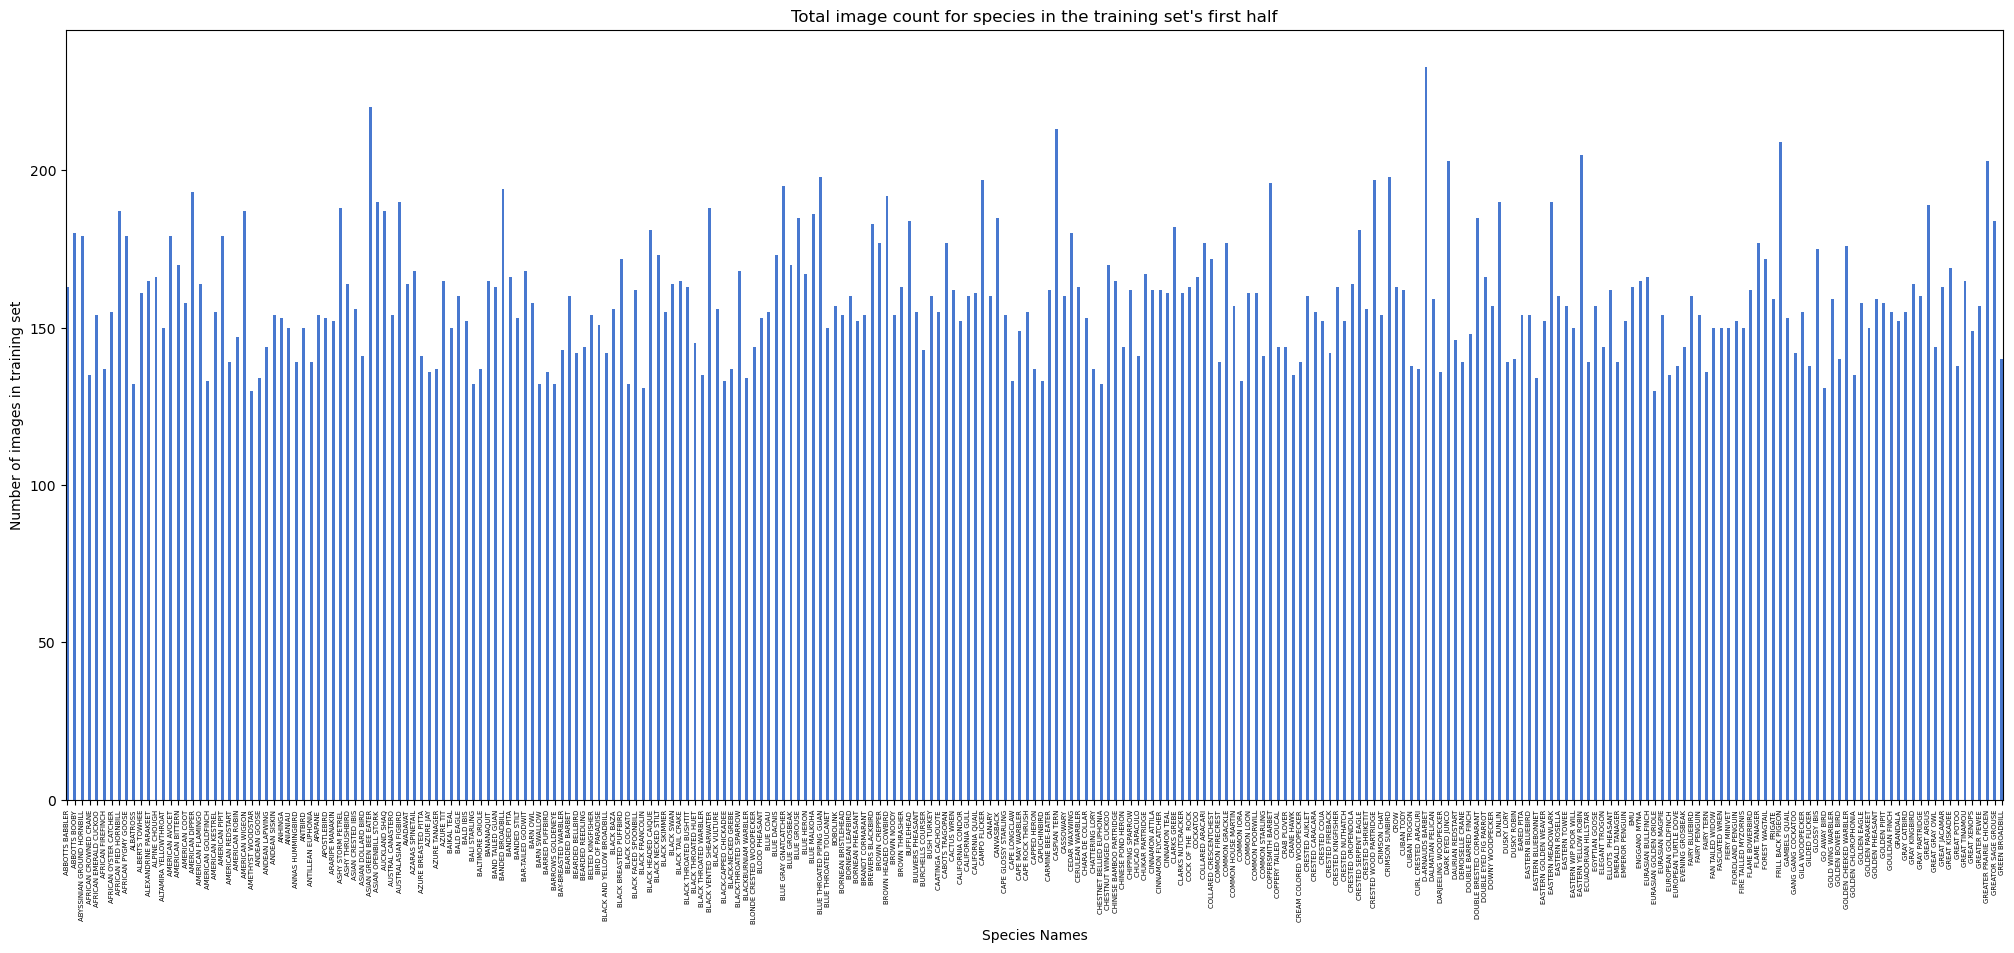

In [17]:
# bar graph depicting image distribution of bird data in training dataset
## because the set is very large: split into 2 graphs to visualize the general distribution

# First half of the training set
plt.figure(figsize=(25,10))
plt.style.use('seaborn-muted')
## bar graph for first half of the training set
plt.bar(split_names[0], split_counts[0], width=0.4)
plt.xticks(rotation=90, fontsize=5)  # each species name
plt.xlabel('Species Names')
plt.ylabel('Number of images in training set')
plt.title('Total image count for species in the training set\'s first half')
plt.margins(x=0)  # remove white spaces at each end of the graph
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_11260\2197042154.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


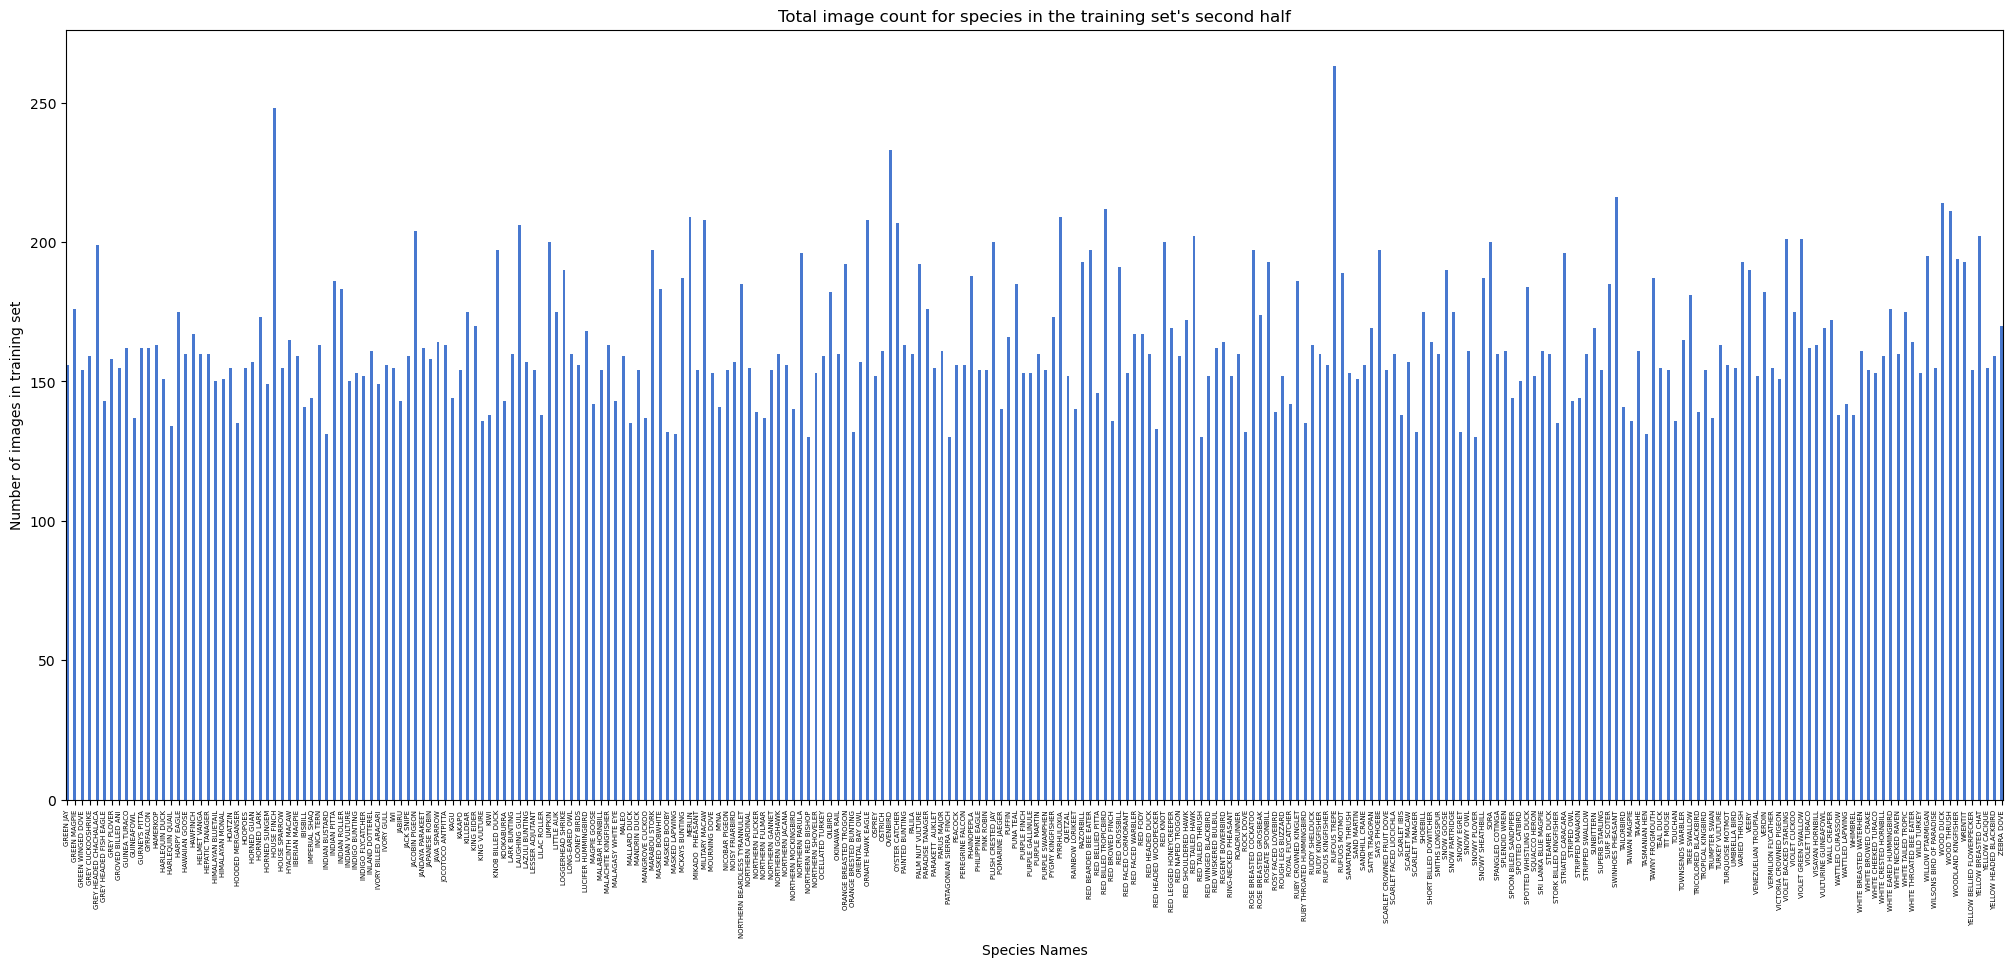

In [16]:
# Second half of the set
plt.figure(figsize=(25,10))
plt.style.use('seaborn-muted')
## bar graph for second half of the training set
plt.bar(split_names[1], split_counts[1], width=0.4)
plt.xticks(rotation=90, fontsize=5)  # each species name
plt.xlabel('Species Names')
plt.ylabel('Number of images in training set')
plt.title('Total image count for species in the training set\'s second half')
plt.margins(x=0)
plt.show()
## overall distribution is fair with few outliers that have more images

In [18]:
# to better visualize the distribution of photos in the training set:
# check the species with the greatest and least amount of training photos
# create a dataframe to analyze
df = pd.DataFrame({'species':species_names, 'image_count': train_images_list})
display(df)

,species,image_count
0,ABBOTTS BABBLER,163
1,ABBOTTS BOOBY,180
2,ABYSSINIAN GROUND HORNBILL,179
3,AFRICAN CROWNED CRANE,135
4,AFRICAN EMERALD CUCKOO,154
...,...,...
520,YELLOW BELLIED FLOWERPECKER,154
521,YELLOW BREASTED CHAT,202
522,YELLOW CACIQUE,155
523,YELLOW HEADED BLACKBIRD,159


In [19]:
df = df.sort_values('image_count')  # sort values by num of images
df.head()  # at the very least, species have 130 photos in the training set

,species,image_count
215,EURASIAN GOLDEN ORIOLE,130
416,RED TAILED THRUSH,130
453,SNOWY PLOVER,130
25,AMETHYST WOODSTAR,130
382,PATAGONIAN SIERRA FINCH,130


In [20]:
df.tail()  # the top 5 species with the most photos

,species,image_count
41,ASIAN GREEN BEE EATER,220
184,D-ARNAUDS BARBET,233
374,OVENBIRD,233
291,HOUSE FINCH,248
434,RUFOUS TREPE,263


In [21]:
df.describe()
# stats for the training set:
## min num of images is 130; max is 263
## mean num of images is 161

,image_count
count,525.000000
mean,161.209524
std,20.621588
min,130.000000
25%,150.000000
50%,158.000000
75%,170.000000
max,263.000000


In [29]:
# new dataframe containing information on how many species have the same image count
# to be used for the circle packing chart
total_count_df = df.pivot_table(index=['image_count'], aggfunc='count')
total_count_df = total_count_df.sort_values('species', ascending=False)
print(total_count_df)

             species
image_count         
154               31
160               29
155               23
152               18
163               18
...              ...
191                1
148                1
147                1
145                1
263                1

[87 rows x 1 columns]


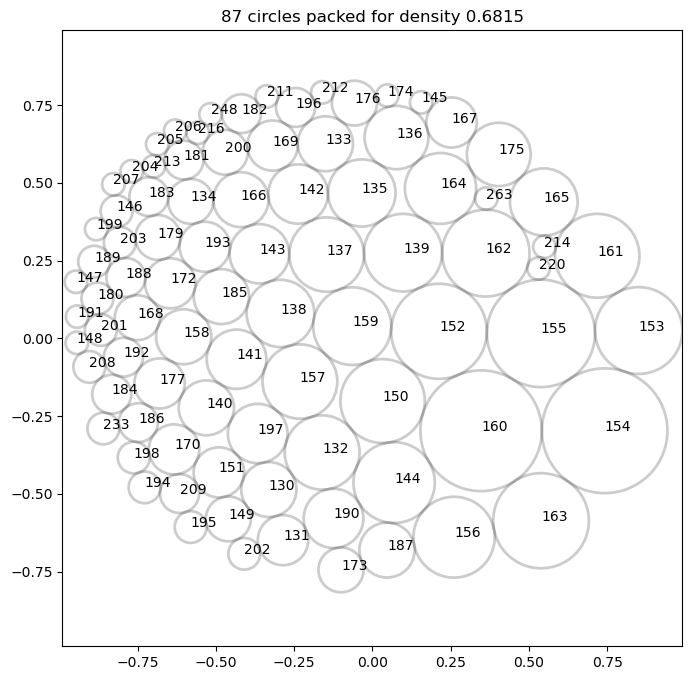

In [31]:
# A circle packing chart to visualize the general distribution of images for each species
## Each circle represents an image count. The circle is larger if there are more species that have the same image count
# create circles using Circlify
circles = circlify.circlify(
    total_count_df['species'].tolist()
)

# get labels for the circles (image count values)
image_count_labels = total_count_df.sort_values('species').index.values.tolist()
# display chart
circlify.bubbles(circles, labels=image_count_labels)

## Creation and training of CNN Model
Create, train, evaluate CNN model then save model when complete.

In [33]:
# creation of model (sequential)

# first get total count of classes for the last layer
total_species_count = len(species_names)  # 525 species in data

# create model
model = Sequential()

# input layer
model.add(layers.Rescaling(scale=1./255, input_shape=(150, 150, 3)))  # standardizing data by rescaling to smaller input values

# hidden layers: strided convolution and maxpooling used (compare both)
## 2 conv2d layers of filter size 16, 32
model.add(layers.Conv2D(16, (5,5), padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(layers.Dropout(0.1))
## 1 conv2d layer of filter size 64; 1 maxpooling2d layer
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(layers.MaxPooling2D(padding='same'))
model.add(layers.Dropout(0.2))
## 2 conv2d layers of filter size 128
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(layers.BatchNormalization())  # if training time is too long - remove
model.add(layers.Dropout(0.25))
## flatten inputs
model.add(layers.Flatten())
## Add fully connected layer of filter size 512
model.add(layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(layers.BatchNormalization())  # if training time is too long - remove
model.add(layers.Dropout(0.5))

# output layer - final prediction: have same num of nodes as classes
model.add(layers.Dense(total_species_count, activation='softmax'))

In [34]:
# compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [35]:
# view model information
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 38, 38, 64)        0         
 D)                                                              
                                                        

In [46]:
# callback for stopping when there is no improvement in loss
stop_training = EarlyStopping(
    monitor='loss',
    patience=4,  # num of epochs w/o improvement before stopping
    verbose=1
)

# train model
training_data = model.fit(
    train_set,
    validation_data=validation_set,
    epochs=5,
    #steps_per_epoch=132,
    callbacks=[stop_training]
)

Epoch 1/5
1323/1323 [==============================] - 1319s 997ms/step - loss: 1.3374 - accuracy: 0.7117 - val_loss: 2.2576 - val_accuracy: 0.5672
Epoch 2/5
1323/1323 [==============================] - 1321s 998ms/step - loss: 1.2235 - accuracy: 0.7371 - val_loss: 2.0549 - val_accuracy: 0.6069
Epoch 3/5
1323/1323 [==============================] - 1311s 991ms/step - loss: 1.1339 - accuracy: 0.7594 - val_loss: 2.0752 - val_accuracy: 0.5939
Epoch 4/5
1323/1323 [==============================] - 1320s 997ms/step - loss: 1.0718 - accuracy: 0.7752 - val_loss: 2.1500 - val_accuracy: 0.5855
Epoch 5/5
1323/1323 [==============================] - 1339s 1s/step - loss: 1.0042 - accuracy: 0.7891 - val_loss: 2.3206 - val_accuracy: 0.5829


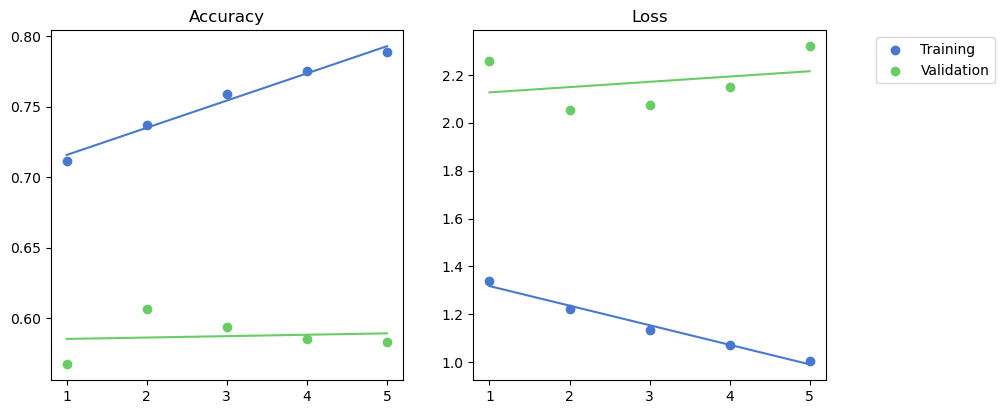

In [48]:
# visualize the changes in accuracy and loss for both training and validation while model was trained
# values for each epoch is graphed on a scatter plot and a line of best fit is included for better visualization

# get values
## accuracy
ac = training_data.history['accuracy']
va = training_data.history['val_accuracy']
## loss
l = training_data.history['loss']
vl = training_data.history['val_loss']
## epochs - x-axis
er = range(1, 6)

# Figure -> for 2 scatterplots
plt.figure(figsize=(10, 10))

# first plot for accuracy
plt.subplot(2, 2, 1)
## plot training accuracy
plt.scatter(er, ac, label='Training')
## best fit line for training
a,b = np.polyfit(er, ac, 1)
plt.plot(er, a*er+b)
## plot validation accuracy
plt.scatter(er, va, label='Validation')
## best fit line for validation
a,b = np.polyfit(er, va, 1)
plt.plot(er, a*er+b)
## title
plt.title('Accuracy')

# second plot for loss
plt.subplot(2, 2, 2)
## plot training loss
plt.scatter(er, l, label='Training')
## best fit line for training
a,b = np.polyfit(er, l, 1)
plt.plot(er, a*er+b)
## plot validation loss
plt.scatter(er, vl, label='Validation')
## best fit line for validation
a,b = np.polyfit(er, vl, 1)
plt.plot(er, a*er+b)
## title
plt.title('Loss')

# legend for both plots
plt.legend(bbox_to_anchor=(1.5, 1))

plt.show()

### Notes:
There is a significant difference between training and validation values indicating that there may be an overfitting issue.
Given the above data, the CNN model should be further tuned and updated. 
Possible changes to make to the CNN for better performance: update the kernel regularizer, add more dropout layers and possibly more batch normalization layers, and update batch size to 32.

In [49]:
# evaluate model performance
result = model.evaluate(test_set, verbose=1)
print(f'loss:{result[0]:.5f}. accuracy:{result[1]:.5f}')  # returns accuracy/loss values

42/42 [==============================] - 18s 419ms/step - loss: 2.0595 - accuracy: 0.6069
loss:2.05951. accuracy:0.60686


In [50]:
# accuracy rate of system as a percentage:
print(f'accuracy rate of bird id system: {result[1]*100:.2f}%')

accuracy rate of bird id system: 60.69%


In [51]:
# get labels within test_set (correct_labels)
batch_list = []
for images, labels in test_set:
    batch_list.append(labels)

In [52]:
# using test set - gather predictions
predictions = model.predict(test_set, verbose=1)
# use predictions and labels from set to create a confusion maxtrix
prediction_labels = np.argmax(predictions, axis=1)
correct_labels = np.concatenate(batch_list)
print(prediction_labels)
print(correct_labels)

42/42 [==============================] - 8s 189ms/step
[353 257   0 ... 524 447 524]
[  0   0   0 ... 524 524 524]


tf.Tensor(
[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]], shape=(525, 525), dtype=int32)


<Axes: >

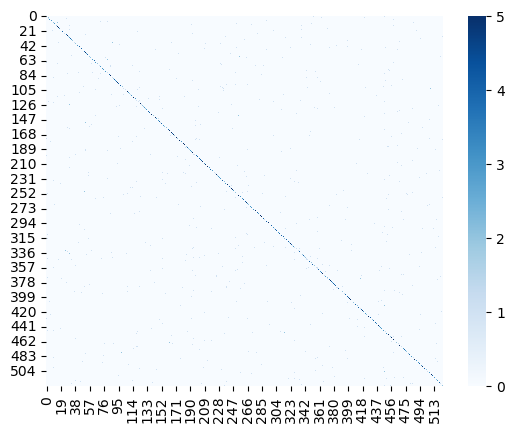

In [53]:
# create confusion matrix
confusion = tf.math.confusion_matrix(correct_labels, prediction_labels)
print(confusion)
sns.heatmap(confusion, cmap='Blues') # xticklabels=, yticklabels=

### Notes:
Given the large dataset (number of species: 525), it is difficult to see the matrix in detail. However, there is a concentration of points along the diagonal of the matrix implying a good number of correct predictions.

In [54]:
# percent of correct predictions
total_correct = 0
# find how many are correct
for i in range(len(prediction_labels)):
    if prediction_labels[i] == correct_labels[i]:
        total_correct += 1
percent_correct = (total_correct/len(prediction_labels)) * 100
print(f'The percent of correct predictions on the test data is: {percent_correct:.2f}%')

The percent of correct predictions on the test data is: 60.69%


The correct species name is: ABYSSINIAN GROUND HORNBILL.


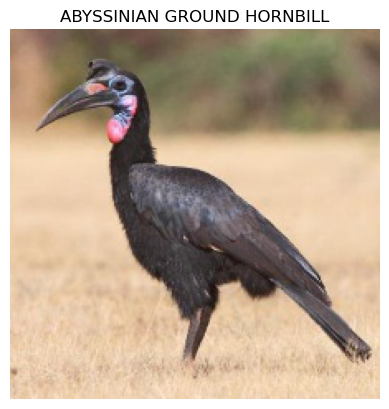

In [57]:
# prediction for a single input

# get and show image with predicted name
test_images = list(glob.glob('./test/*/*'))
name = test_images[12].split('\\')[1]  # correct name of bird species in image
test_image = img.imread(test_images[12])  # access image

# make prediction with image
img_array = tf.expand_dims(test_image, 0)  # create a batch
img_array = tf.image.resize(img_array, [150,150])  # resize to correct shape
predicted_species = model(img_array, training=False)  # make prediction

# display image and title (predicted name)
plt.title(species_names[np.argmax(predicted_species[0])])  # predicted name as title of image
plt.axis('off')  # remove x/y axis of image
plt.imshow(test_image)   # display image

# display the correct species name
print(f'The correct species name is: {name}.')

In [58]:
# save model
# model.save('cnn_model.keras')  # comment out after saving; if model is updated and trained again, uncomment and save.

## Interact with the Bird Identification System
### This section is for users who wish to try out the bird identification system
Follow instructions below: <br>
****To run a 'cell' (ex: one block of code below): first select the cell then click on the Run icon in the top menu bar or press Ctrl+Enter on your keyboard.**

#### 1. Navigate to the very top of the notebook and run the first two cells to install and import the necessary packages then return to this section.

#### 2. Select and run the cell below: load the model that was created and trained above to identify a bird species from within a photo. 

In [59]:
# load model
birdid_model = keras.models.load_model('cnn_model.keras')

In [60]:
# for continuous training:
#training_data = birdid_model.fit(
#    train_set,
#    validation_data=validation_set,
#    epochs=10,
#    #steps_per_epoch=132,
#    callbacks=[stop_training]
#)

#### 3. Select and run the cell below: gather all the species names. This list will be used to determine the name of the predicted species when  the identification system is utilized.

In [71]:
# list of species names to use for prediction after loading model
test_species_names=[]
name_list = list(glob.glob('./test/*'))
for i in range(len(name_list)):
    name = name_list[i].split('\\')[1]
    test_species_names.append(name)

#### 4. Replace the 0 where indicated with a value between 0 and 4 in the code below. 
Each value represents a different image from within the 'user' folder containing images that were not used to train and test the model. 

#### 5. Select and run the cell below: the inputted image will display with the predicted species name as the image title. The correct species name will also be indicated above the image.

The correct species name is: BALD EAGLE.


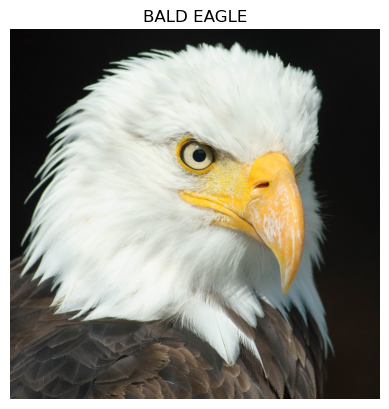

In [112]:
# User inputted single image prediction:
## given 60% accuracy rate - not all will be a correct prediction

# replace the 0 below with any value between 0 and 4 (0, 1, 2, 3, or 4) 
i = 0

# get and show image with predicted name
user_input = list(glob.glob('./user/*/*'))
name = user_input[i].split('\\')[1]
user_image = img.imread(user_input[i])

# make prediction with image
img_array = tf.expand_dims(user_image, 0)  # create a batch
img_array = tf.image.resize(img_array, [150,150])  # resize to correct shape
predicted_species = birdid_model(img_array, training=False)  # make prediction

# display image and title (predicted name)
plt.title(test_species_names[np.argmax(predicted_species[0])])  # predicted name as title of image
plt.axis('off')  # remove x/y axis of image
plt.imshow(user_image)   # display image

# display the correct species name
print(f'The correct species name is: {name}.')